In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [16]:
stock_data = pd.read_csv('adobe-stock-data.csv')
analyst_data = pd.read_csv('adobe-analyst-data.csv')
analyst_data = analyst_data.rename(columns={'analytst':'analyst'})
analyst_data['date'] = pd.to_datetime(analyst_data['date'])
stock_data = stock_data.rename(columns={'Date':'date'})
stock_data['date'] = pd.to_datetime(stock_data['date'])
stock_data_needed = stock_data[['date', 'Close']]

In [17]:
analyst_data.at[27, 'price_target_after'] = 650
analyst_data.at[27, 'price_target_before'] = 720 
analyst_data.at[255, 'price_target_after'] = 520
analyst_data.at[255, 'price_target_before'] = 460
analyst_data.at[334, 'price_target_after'] = 570
analyst_data.at[334, 'price_target_before'] = 440
analyst_data.at[537, 'price_target_after'] = 358
analyst_data.at[537, 'price_target_before'] = 350

In [18]:
analyst_data['price_target_before'] = pd.to_numeric(analyst_data['price_target_before'], errors='coerce')
analyst_data['price_target_after'] = pd.to_numeric(analyst_data['price_target_after'], errors='coerce')
analyst_data_cleaned = analyst_data.dropna(subset=['price_target_after'])

In [19]:
analyst_data_date_sort = analyst_data_cleaned.sort_values(by='date', ascending=False)

In [20]:
analyst_data_date_sort.head()

,date,company_Name,ticker,broker,analyst,rating_before,rating_after,price_target_before,price_target_after
728,2025-09-05,Adobe Systems Inc,ADBE,NaN,SAKET KALIA,Overweight,Overweight,460.0,460.0
329,2025-08-29,Adobe Systems Inc,ADBE,NaN,KARL KEIRSTEAD,Neutral,Neutral,400.0,400.0
228,2025-06-20,Adobe Systems Inc,ADBE,NaN,GIL LURIA,Buy,Buy,500.0,500.0
805,2025-06-16,Adobe Systems Inc,ADBE,CITI,TYLER RADKE,NEUTRAL,NEUTRAL,NaN,450.0
244,2025-06-13,Adobe Systems Inc,ADBE,MIZUHO,GREGG MOSKOWITZ,OUTPERFORM,OUTPERFORM,575.0,530.0


In [21]:
adobe_data = pd.merge(left=analyst_data_date_sort, right=stock_data_needed, on='date', how='inner')

In [22]:
adobe_data.head()

,date,company_Name,ticker,broker,analyst,rating_before,rating_after,price_target_before,price_target_after,Close
0,2025-09-05,Adobe Systems Inc,ADBE,NaN,SAKET KALIA,Overweight,Overweight,460.0,460.0,348.97
1,2025-08-29,Adobe Systems Inc,ADBE,NaN,KARL KEIRSTEAD,Neutral,Neutral,400.0,400.0,356.70
2,2025-06-20,Adobe Systems Inc,ADBE,NaN,GIL LURIA,Buy,Buy,500.0,500.0,376.92
3,2025-06-16,Adobe Systems Inc,ADBE,CITI,TYLER RADKE,NEUTRAL,NEUTRAL,NaN,450.0,401.73
4,2025-06-13,Adobe Systems Inc,ADBE,MIZUHO,GREGG MOSKOWITZ,OUTPERFORM,OUTPERFORM,575.0,530.0,391.68


In [23]:
def days_to_hit_target(analyst_data, stock_data):
    stock_data = stock_data.sort_values("date")

    def compute_days(row):
        start_date = row["date"]
        target = row["price_target_after"]

        future_stocks = stock_data[stock_data["date"] > start_date].sort_values("date")

        if future_stocks.empty:
            return np.nan

        if target >= row["Close"]:
            hit = future_stocks[future_stocks["High"] >= target]

        else:
            hit = future_stocks[future_stocks["Low"] <= target]

        if hit.empty:
            return np.nan

        hit_date = hit.iloc[0]["date"]
        return len(future_stocks[future_stocks["date"] <= hit_date])

    analyst_data["days_to_target"] = analyst_data.apply(compute_days, axis=1)
    return analyst_data


In [24]:
days_to_hit_target(adobe_data, stock_data).tail()

,date,company_Name,ticker,broker,analyst,rating_before,rating_after,price_target_before,price_target_after,Close,days_to_target
779,2013-09-18,Adobe Systems Inc,ADBE,DEUTSCHE BANK,NANDAN AMLADI,,BUY,52.0,58.0,52.58,61.0
780,2013-06-19,Adobe Systems Inc,ADBE,DEUTSCHE BANK,NANDAN AMLADI,BUY,BUY,50.0,52.0,45.78,63.0
781,2013-03-20,Adobe Systems Inc,ADBE,NaN,MATTHEW HEDBERG,Outperform,Outperform,52.0,52.0,42.46,126.0
782,2012-12-14,Adobe Systems Inc,ADBE,NaN,MATTHEW HEDBERG,Outperform,Outperform,42.0,42.0,37.56,64.0
783,2012-12-14,Adobe Systems Inc,ADBE,JMP,PATRICK WALRAVENS,OUTPERFORM,UNDERPERFORM,NaN,42.0,37.56,64.0


In [34]:
adobe_data['pt_close_difference'] = abs(adobe_data['price_target_after'] - adobe_data['Close'])
adobe_data.tail()

,date,company_Name,ticker,broker,analyst,rating_before,rating_after,price_target_before,price_target_after,Close,days_to_target,pt_close_difference
779,2013-09-18,Adobe Systems Inc,ADBE,DEUTSCHE BANK,NANDAN AMLADI,,BUY,52.0,58.0,52.58,61.0,5.42
780,2013-06-19,Adobe Systems Inc,ADBE,DEUTSCHE BANK,NANDAN AMLADI,BUY,BUY,50.0,52.0,45.78,63.0,6.22
781,2013-03-20,Adobe Systems Inc,ADBE,NaN,MATTHEW HEDBERG,Outperform,Outperform,52.0,52.0,42.46,126.0,9.54
782,2012-12-14,Adobe Systems Inc,ADBE,NaN,MATTHEW HEDBERG,Outperform,Outperform,42.0,42.0,37.56,64.0,4.44
783,2012-12-14,Adobe Systems Inc,ADBE,JMP,PATRICK WALRAVENS,OUTPERFORM,UNDERPERFORM,NaN,42.0,37.56,64.0,4.44


In [35]:
adobe_data_no_nan = adobe_data.dropna(subset=['days_to_target'])

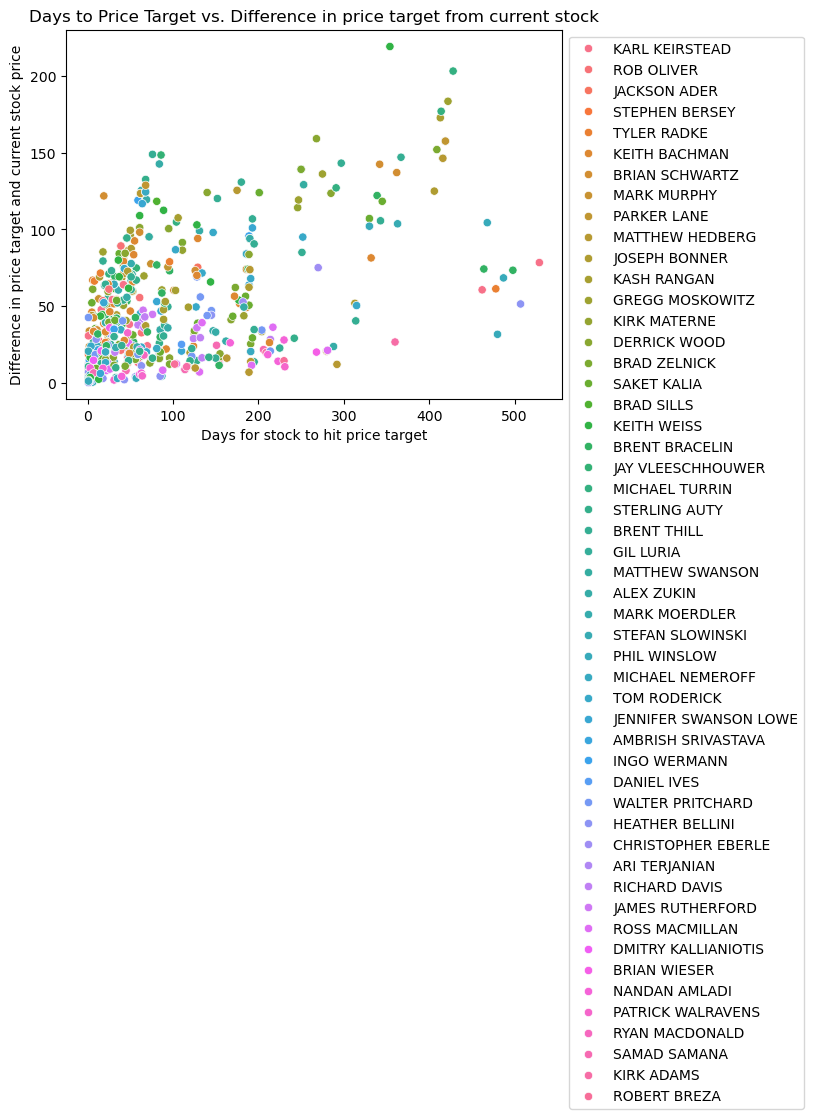

In [37]:
sns.scatterplot(adobe_data_no_nan, x='days_to_target', y='pt_close_difference', hue='analyst')
plt.title('Days to Price Target vs. Difference in price target from current stock')
plt.xlabel('Days for stock to hit price target')
plt.ylabel('Difference in price target and current stock price')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [42]:
analyst_average = adobe_data_no_nan.groupby('analyst')['days_to_target'].mean().to_frame()
analyst_average['avg_difference'] = adobe_data_no_nan.groupby('analyst')['pt_close_difference'].mean()

In [49]:
analyst_average = analyst_average.reset_index()

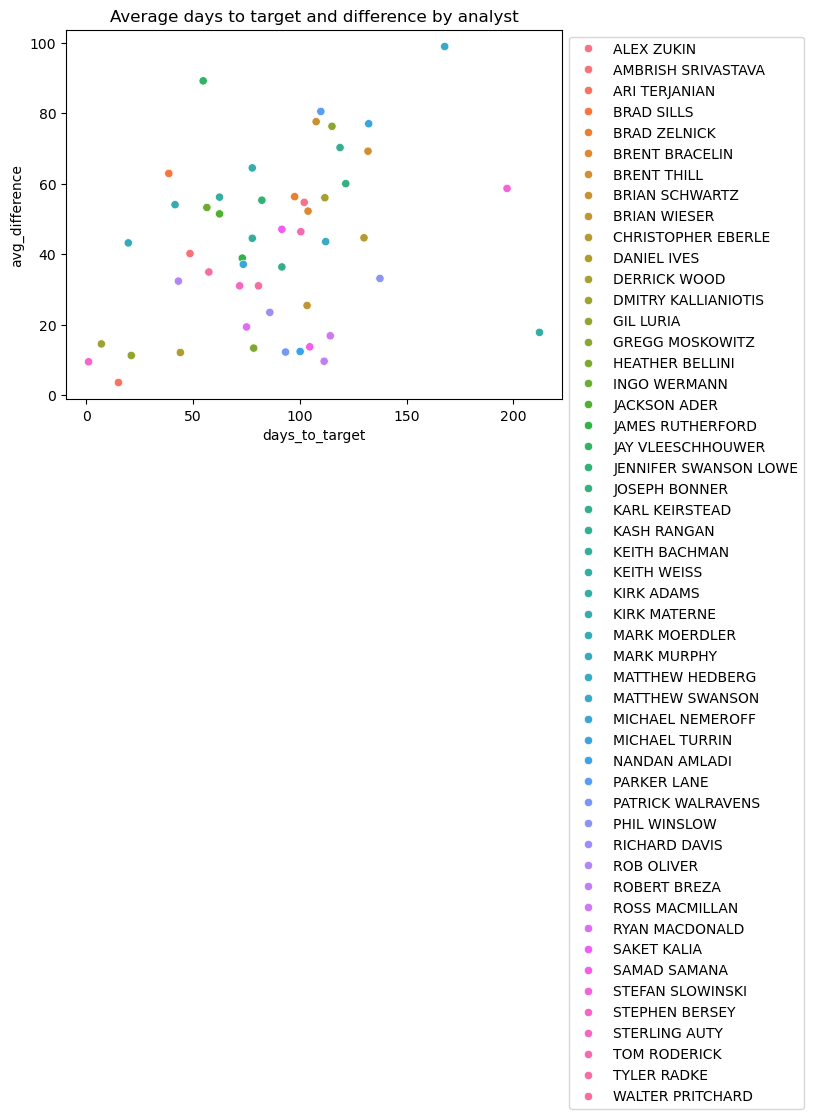

In [54]:
sns.scatterplot(analyst_average, x='days_to_target', y='avg_difference', hue='analyst')
plt.title('Average days to target and difference by analyst')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

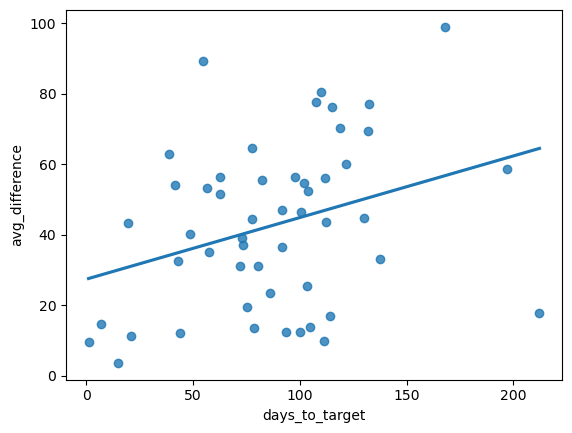

In [55]:
sns.regplot(analyst_average, x='days_to_target', y='avg_difference', ci=None)
plt.show()

In [71]:
never_hit_pt = adobe_data.groupby('analyst')['days_to_target'].apply(lambda x: x.isna().sum()).to_frame()
never_hit_pt_sorted = never_hit_pt.sort_values('days_to_target')

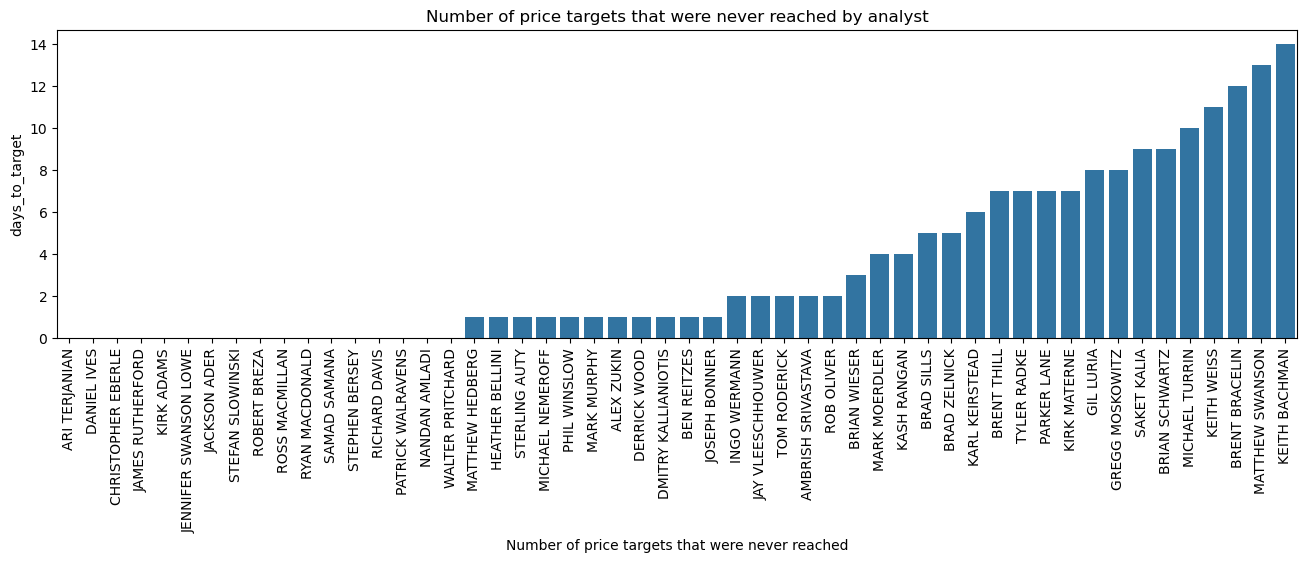

In [72]:
plt.figure(figsize=(16,4))
sns.barplot(never_hit_pt_sorted, x='analyst', y='days_to_target')
plt.xticks(rotation=90)
plt.title('Number of price targets that were never reached by analyst')
plt.xlabel('Number of price targets that were never reached')
plt.show()